In [20]:
import os
import sys
import shutil
import matplotlib.pyplot as plt

sys.path.append('..')
from libs.datasets import UnlearnDatasetImagenette, UnlearnDatasetCifar, UnlearnDatasetSplitMode, UnlearnDatasetSplit

# Imagenette

Dataset already downloaded and extracted. Skipping download.
867


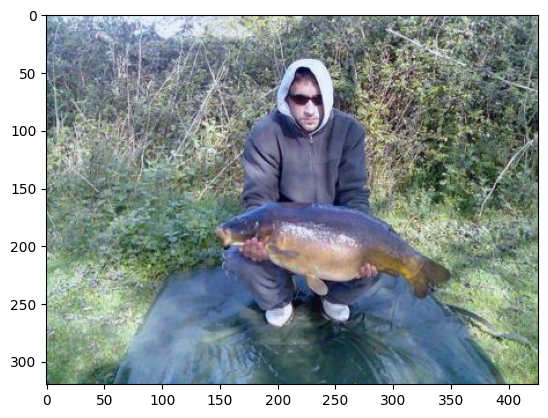

In [22]:
dataset = UnlearnDatasetImagenette(
    split_mode=UnlearnDatasetSplitMode.Class,
    split_kwargs={"forget": [next(iter(UnlearnDatasetImagenette.class_mapping))]},
    download_path="assets/imagenette",
)

loader = dataset.get_loader(UnlearnDatasetSplit.Train_forget, 1)
print(len(loader))

tensor = next(iter(loader))[0][0]
image = (tensor - tensor.min()) / (tensor.max() - tensor.min())
image = image.permute(1, 2, 0).numpy()
plt.imshow(image)

In [ ]:
if os.path.exists('assets/imagenette_splits'):
    shutil.rmtree('assets/imagenette_splits')

for c in UnlearnDatasetImagenette.class_mapping:
    print('-'*80)
    print('Forgetting', UnlearnDatasetImagenette.class_mapping[c])
    dataset = UnlearnDatasetImagenette(
        split_mode=UnlearnDatasetSplitMode.Class,
        split_kwargs={"forget": [c]},
        download_path="assets/imagenette",
    )
    dataset.save(f"assets/imagenette_splits/{c}", format='jpg')


# Cifar

In [23]:
main_folder = os.getcwd()
root_dataset = main_folder + 'assets/datasets'
os.makedirs(root_dataset, exist_ok=True)

dataset = UnlearnDatasetCifar(
    download_path = root_dataset,
    split_mode = UnlearnDatasetSplitMode.Class,
    split_kwargs = {
        'forget': ['cat','frog']
    },
)

splitted = dataset.get_splits()
print(list(splitted.keys()))

100%|██████████| 170M/170M [00:11<00:00, 15.1MB/s] 


[<UnlearnDatasetSplit.Train: 'train'>, <UnlearnDatasetSplit.Validation: 'validation'>, <UnlearnDatasetSplit.Test: 'test'>, <UnlearnDatasetSplit.Train_retain: 'train_retain'>, <UnlearnDatasetSplit.Train_retain_MIA: 'train_retain_mia'>, <UnlearnDatasetSplit.Train_forget: 'train_forget'>, <UnlearnDatasetSplit.Validation_retain: 'validation_retain'>, <UnlearnDatasetSplit.Validation_forget: 'validation_forget'>, <UnlearnDatasetSplit.Test_retain: 'test_retain'>, <UnlearnDatasetSplit.Test_forget: 'test_forget'>]


2250


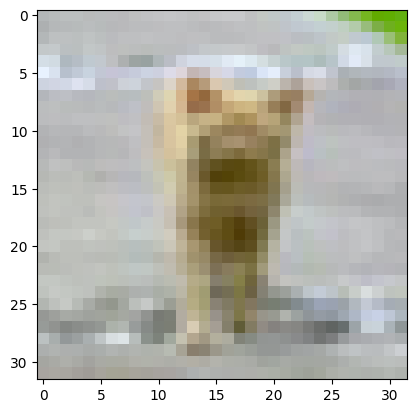

In [29]:
loader = dataset.get_loader(UnlearnDatasetSplit.Train_forget, 4)
print(len(loader))

tensor = next(iter(loader))[0][0]
image = (tensor - tensor.min()) / (tensor.max() - tensor.min())
image = image.permute(1, 2, 0).numpy()
plt.imshow(image)